<a href="https://colab.research.google.com/github/jsleeg98/Kaggle_practice/blob/main/Porto/Data_Preparation_%26_Exploration_%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

competition 준비
1. overview 읽어보기
2. Data Description 보기
3. notebook 찾아보기 (most voted, best score)
4. Leaderboard 
5. Rule


Google drive mount 

In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
%cd drive/MyDrive/kaggle/Porto/

[Errno 2] No such file or directory: 'drive/MyDrive/kaggle/Porto/'
/content/drive/MyDrive/kaggle/Porto


# Loading packages

In [82]:
pip install Imputer

ERROR: Could not find a version that satisfies the requirement Imputer (from versions: none)
ERROR: No matching distribution found for Imputer


In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

# 필요없는 feature를 제거하는 기능
from sklearn.feature_selection import VarianceThreshold

from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)


In [84]:
# from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer as Imputer



# Loading data

In [85]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [86]:
cat_cols = [col for col in train.columns if 'cat' in col]

# 분류 데이터에서 데이터 종류 보기
for col in cat_cols:
  print(col, train[col].nunique())

ps_ind_02_cat 5
ps_ind_04_cat 3
ps_ind_05_cat 8
ps_car_01_cat 13
ps_car_02_cat 3
ps_car_03_cat 3
ps_car_04_cat 10
ps_car_05_cat 3
ps_car_06_cat 18
ps_car_07_cat 3
ps_car_08_cat 2
ps_car_09_cat 6
ps_car_10_cat 3
ps_car_11_cat 104


# Data at first sight

Here is an excerpt of the data description for the competition:
경연을 위한 데이터 설명을 발췌한 것이다.

- Features that belong to similar groupings are tagged as such in the feature names(e.g ind, reg, car, calc)
  - 비슷한 그룹의 특징은 ind, reg, car, calc과 같은 이름으로 태그되어있다.

- Feature names include the postfix bin to indicate binary features and cat to indicate categorical features.
  - 특징에 붙어있는 접미사 bin은 binary를 의미하고 cat은 categorical feature를 의미한다.

- Features without these designations are either continuous ro ordinal.
  - 명칭이 없는 특징은 continuous거나 ordinal 특징이다.


- Values of -1 indicate that the feature was missing from the observation
  - -1 값은 빈 값을 의미한다.

- The target columns signifies whether or not a claim was filled for that policy holder.
  - target 데이터는 이전에 claim이 있었으면 1 없었으면 0으로 표기

Ok, that's important information to get us started. Let's have a quick look at the first and last rows to confirm all of this.

In [87]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [88]:
train.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.1,0.2,-1.000000,7,0,-1,0,-1,0,1,0,2,1,34,2,0.400000,0.932649,0.378021,3.741657,0.4,0.0,0.5,2,3,10,4,10,2,5,4,4,3,8,0,1,0,0,0,0


We indeeed see the following

- binary variables
  - 이진 값
- categorical variables of which the category values are integers
  - 분류 값은 정수
- other variables with integer or float values
  - 다른 변수는 정수나 실수
- variables with -1 representing missing values
  - -1 은 빈 값을 의미
- the target variable and an ID variable

In [89]:
train.shape

(595212, 59)

We have 59 variables and 595,212 rows. Let's see if we have the same number of variables in the test data.
- 59 변수와 595212개의 행이 있다. test 데이터에도 같은 변수가 있는지 알아보자

Let's see if there are duplicate rows in there training data.
- train 데이터에 중복 데이터가 있는지 확인해보자


In [90]:
train.drop_duplicates()
train.shape

(595212, 59)

중복 데이터는 없었다.

In [91]:
test.shape

(892816, 58)

We are missing one variable in the test set, but this is the target variable. So that's fine. Let's now investigate how many variables of each type we have.
- 테스트 데이터에 하나의 변수가 없다. 그러나 이것은 목표 변수이다. 


So later on we can create dummy variables for the 14 categorical variables. The bin variables are already binary and do not need dummification.
- 나주에 우리는 14개의 분류형 변수에 대해 dummy 변수를 생성할 수 있다. 이진 변수는 이미 이진화되어있고 dummy 가 필요없다.

In [92]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

Again, with the info() method we see that the data type is integer or float.
- 다시, info()는 데이터 타입이 정수인지 실수인지 알 수 있다.

No null values are present in the data set.
- 빈 값이 데이터 셋에 없다.

That's normal because missing values are replaced by -1.
- 이는 정상이다. 왜냐하면 빈 값이 -1로 되어있기 때문이다.

# Metadata

To facilitate the data management, we'll store meta-information about the variables in a DataFrame. 
- 데이터를 관리하기 위해서, 우리는 meta-information을 저장한다. 데이터 프레임에

This will be helpful when we want to select specific variables for analysis, visualization, modeling,
- 이는 우리가 분석, 시각화, 모델릴을 할 때 특정 변수를 선택할 때 도움을 준다.


Concretely we will store:

- role : input, ID, target
- level : nominal, interval, ordinal, binary
- keep : True or False - 나중에 쓸지 말지
- dtype : int, float, str

In [93]:
data = []

for f in train.columns:
  # Defining the role
  if f ==  'target' : 
    role = 'target'
  elif f == 'id':
    role = 'id'
  else:
    role = 'input'
  
  # Defining the level
  if 'bin' in f or f == 'target': # bin이 포함되어 있거나, target 이면
    level = 'binary'
  elif 'cat' in f or f == 'id': # cat이 포함되어 있거나, id 이면
    level = 'nominal'
  elif train[f].dtype == float:
    level = 'interval'
  elif train[f].dtype == int:
    level = 'ordinal'
  
  # Initialize keep to True for all variables except for id
  keep = True
  if f == 'id':
    keep = False
  
  # Defining the data type
  dtype = train[f].dtype

  # Creating a Dict that contains all the metadata for the variable
  f_dict = {
      'varname' : f,
      'role' : role,
      'level' : level,
      'keep' : keep,
      'dtype' : dtype
  }
  data.append(f_dict)

meta = pd.DataFrame(data, columns = ['varname', 'role', 'level', 'keep', 'dtype']) # 열 순서 설정
meta.set_index('varname', inplace = True)

In [94]:
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


Example to extract all nominal variables that are not dropped


In [95]:
meta[(meta.level == 'nominal') & (meta.keep)].index # nominal 이면서 챙겨갈 인덱스

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

Below the number of variables per role and level are displayed.
- 역할과 수준별 변수 값이 나와있다.

In [96]:
pd.DataFrame({'count' : meta.groupby(['role', 'level'])['role'].size()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,10
3,input,nominal,14
4,input,ordinal,16
5,target,binary,1


# Descriptive statistics

We can also apply the describe method on the dataframe. However, it doesn't make much sense to calculate the mean, std,,, on categorical variables and the id variable. 
- 우리는 설명 방법을 데이터 프레임에 적용할 수 있다. 그러나, 이것은 평균, 표준편차 등을 계산하는 것은 의미가 없다.

We'll explore the categorical variables visually later.
- 우리는 분류 변수를 시각적으로 나중에 볼 것이다.

Thanks to our meta file we can easily select the variables on which we want to compute the descriptive statistics. To keep things clear, we'll do this per data type.
- meta file 덕분에 우리는 쉽게 설명 통계를 계산할 변수를 선택할 수 있다. 

## Interval variables

In [97]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
train[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


reg variables

* only ps_reg_03 has missing values
  - 3의 min -1이 있어 빈 값이 있다는 것을 알 수 있다.

* the range (min to max) differs between the variables. We could apply scaling(e.g. StandardScaler), but it depends on the classifier we will want to use
  - 범위가 변수마다 다 다르다. 우리는 scaling을 적용할 수 있다, 그러나 이는 우리가 나중에 사용하려고 하는 분류기에 따라 다르다.

car variables

* ps_car_12 and ps_car_15 have missing values
  - 12, 15는 빈 값이 있다.
* again, the range differs and we could apply scaling.

calc variables
* no missing values
  - 빈 값이 없다.
* this seems to be some kind of ratio as the maximum is 0.9
  - 최대 0.9가 많아 보인다.
* all three_calc variables have very similar distributions
- 모든 변수가 비슷한 분포를 가지고 있다.

Overall, we can see that the range of the interval variables is rather small. Perhaps some transformation(e.g. log) is already applied in order to anonymize the data?
- 사이 범위가 좀 작아 보인다. 아마 몇몇 변형이 이미 적용되어서 그런게 아닐까? 비식별화가 되어있다.



## Ordinal variables


In [98]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
train[v].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


* Only one missing variable : ps_car_11
* we could apply scaling to deal with the different ranges
  - 우리는 다른 범위에 대해 스케일링을 적용할 수 있다.
  

## Binary variables

In [99]:
v = meta[(meta.level == 'binary') & (meta.keep)].index
train[v].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* A priori in the train data is 3.634%, which is strongly imbalanced.
  - priori는 3.634%로 아주 불균형적이었다. target
* From the means we can conclude that for most variables the value is zero in most cases.
  - 평균으로부터 우리는 대부분의 값이 0이라는 것을 알 수 있다.

# Handling imbalanced classes

As we mentioned above the proportino of records with target = 1 is far less than target = 0. This can lead to a model that has great accuracy but does have any added value in practice. Two possible strategies to deal with this problem are:
- target = 1의 데이터의 비율이 target = 0보다 아주 것다. 이는 모델을 정확하게 하지만 문제가 있다.
이 문제를 해결하는 두가지 방법이 있다.

* oversampling records with target = 1 
  - 부풀리는 것
* undersampling records with target = 0
  - 줄이는 것

There are many more strategies of course and MachineLearningMastery.com gives a nice overview. As we have a rather large training set, we can go for undersampling.


In [100]:
desired_apriori = 0.10

# Get the indices per target value
idx_0 = train[train.target == 0].index
idx_1 = train[train.target == 1].index

# Get original number of records per target value
nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])

# Calculate the undersampling rate and resulting number of records with target = 0
undersampling_rate = ((1 - desired_apriori)*nb_1) / (nb_0 * desired_apriori )

undersampled_nb_0 = int(undersampling_rate * nb_0)
print('Rate to undersample records with target = 0: {}'.format(undersampling_rate))
print('Number of records with target = 0 after undersampling : {}'.format(undersampled_nb_0))

# Randomly select records with target = 0 to get at the desired a priori
undersampled_idx = shuffle(idx_0, random_state = 37, n_samples = undersampled_nb_0)

# Construct list with remaining indices
idx_list = list(undersampled_idx) + list(idx_1)

# Return undersample data frame
train = train.loc[idx_list].reset_index(drop = True)

Rate to undersample records with target = 0: 0.34043569687437886
Number of records with target = 0 after undersampling : 195246


# Data Quality Checks

## Checking missing values

Missings are represented as -1

In [101]:
vars_with_missing = []

for f in train.columns:
  missings = train[train[f] == -1][f].count()
  if missings > 0:
    vars_with_missing.append(f)
    missings_perc = missings/ train.shape[0]

    print('Varialbe {} has {} records ({:.2%}) with missing values'.format(f, missings, missings_perc))
    print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

Varialbe ps_ind_02_cat has 103 records (0.05%) with missing values
In total, there are 1 variables with missing values
Varialbe ps_ind_04_cat has 51 records (0.02%) with missing values
In total, there are 2 variables with missing values
Varialbe ps_ind_05_cat has 2256 records (1.04%) with missing values
In total, there are 3 variables with missing values
Varialbe ps_reg_03 has 38580 records (17.78%) with missing values
In total, there are 4 variables with missing values
Varialbe ps_car_01_cat has 62 records (0.03%) with missing values
In total, there are 5 variables with missing values
Varialbe ps_car_02_cat has 2 records (0.00%) with missing values
In total, there are 6 variables with missing values
Varialbe ps_car_03_cat has 148367 records (68.39%) with missing values
In total, there are 7 variables with missing values
Varialbe ps_car_05_cat has 96026 records (44.26%) with missing values
In total, there are 8 variables with missing values
Varialbe ps_car_07_cat has 4431 records (2.04

* ps_car_03 and ps_car_05_cat have a large proportion of records with missing values. Remove these variables.
  - ps_car_03, ps_car_05_cat 은 많은 빈 값이 있다. 이들을 지운다.

* For the other categorical variables with missing values, we can leave the missing value -1 as such.
  - 빈 값이 있는 분류 변수들은 우리는 -1으로 남겨둘 수 있다.

* ps_reg_03 (continuous) has missing values for 18% of all records. Replace by the mean.
  - ps_reg_03은 18%의 빈 값이 있고 이는 평균으로 대체한다.

* ps_car_11 (ordinal) has only 5 records with missing values. Replace by the mode.
  -ps_car_11은 5개만 비어있고 이는 mode로 대체한다.

* ps_car_12 (continuous) has only 1 records with missing value. Replace by the mean.
  - ps_Car_12는 1개만 비어있다. 이는 평균으로 대체한다.

* ps_car_14 (continuos) has missing values for 7% of all records. Replace by the mean.
  - pa_car_14은 7%의 빈 값이 있고 이는 평균으로 대체한다.

In [102]:
# Dropping the variable with too many missing values
vars_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
train.drop(vars_to_drop, inplace = True, axis = 1)
meta.loc[(vars_to_drop), 'keep'] = False # Updatting the meta


In [103]:

# imputing with the mean or mode
mean_imp = Imputer(missing_values = -1, strategy = 'mean') # -1을 평균으로 채운다.
mode_imp = Imputer(missing_values = -1, strategy = 'most_frequent') # -1을 가장 빈도가 높은 것으로 채운다.
train['ps_reg_03'] = mean_imp.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_12'] = mean_imp.fit_transform(train[['ps_car_12']]).ravel()
train['ps_car_14'] = mean_imp.fit_transform(train[['ps_car_14']]).ravel()
train['ps_car_11'] = mode_imp.fit_transform(train[['ps_car_11']]).ravel()

## Checking the cardinality of the categorical variables

Cardinality refers to the number of different values in a variable. As we will create dummy variables from the categorical variables later on, we need to check whether there are variables with many distinct values. We should handle these variables differently as they would result in many dummy variables.
- cardinality는 변수의 다른 값들을 의미한다. 분류 데이터를 나중에 dummy 변수로 만들기 때문에 우리는 많은 분별있는 값이 있는지 확인해봐야한다. 우리는 이것들을 개별적으로 다뤄야하고 그들은 많은 dummy 변수를 초래할 수 있다.

- 너무 많은 변수가 생기면 시간이 오래걸리고 원하지 않는 분류가 생길 수 있다.


In [104]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
  dist_values = train[f].value_counts().shape[0]
  print('Variable {} has {} distinct values'.format(f, dist_values))

Variable ps_ind_02_cat has 5 distinct values
Variable ps_ind_04_cat has 3 distinct values
Variable ps_ind_05_cat has 8 distinct values
Variable ps_car_01_cat has 13 distinct values
Variable ps_car_02_cat has 3 distinct values
Variable ps_car_04_cat has 10 distinct values
Variable ps_car_06_cat has 18 distinct values
Variable ps_car_07_cat has 3 distinct values
Variable ps_car_08_cat has 2 distinct values
Variable ps_car_09_cat has 6 distinct values
Variable ps_car_10_cat has 3 distinct values
Variable ps_car_11_cat has 104 distinct values


Only ps_car_11_cat has many distict values, although it is still reasonable.
- ps_car_11_cat은 많은 다른 값이 있다. 

overfitting이 되지 않도록 noise를 넣어준다.

In [105]:
# Script by https://www.kaggle.com/ogrellier
# Code: https://www.kaggle.com/ogrellier/python-target-encoding-for-categorical-features
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, 
                  tst_series=None, 
                  target=None, 
                  min_samples_leaf=1, 
                  smoothing=1,
                  noise_level=0):
    """
    Smoothing is computed like in the following paper by Daniele Micci-Barreca
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior  
    """ 
    assert len(trn_series) == len(target) # assert는 True는 진행하고 False는 에러가 나게 하는 것
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)

    # Compute target mean 
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])

    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))

    # Apply average function to all target data
    prior = target.mean()

    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [106]:
train_encoded, test_encoded = target_encode(train["ps_car_11_cat"], 
                             test["ps_car_11_cat"], 
                             target=train.target, 
                             min_samples_leaf=100,
                             smoothing=10,
                             noise_level=0.01)
    
train['ps_car_11_cat_te'] = train_encoded
train.drop('ps_car_11_cat', axis=1, inplace=True)
meta.loc['ps_car_11_cat','keep'] = False  # Updating the meta
test['ps_car_11_cat_te'] = test_encoded
test.drop('ps_car_11_cat', axis=1, inplace=True)

---

**함수 뜯어보기**

In [54]:
trn_series = train["ps_car_11_cat"]
tst_series = test["ps_car_11_cat"]
target = train.target
min_samples_leaf = 100
smoothing = 10
noise_level = 0.01

In [55]:
assert len(trn_series) == len(target)
assert trn_series.name == tst_series.name

In [56]:
temp = pd.concat([trn_series, target], axis = 1)

In [57]:
temp

,ps_car_11_cat,target
0,26,0
1,104,0
2,15,0
3,74,0
4,78,0
...,...,...
216935,104,1
216936,5,1
216937,104,1
216938,104,1


In [58]:
averages = temp.groupby(by = trn_series.name)[target.name].agg(['mean', 'count'])

In [59]:
smoothing = 1 / (1 + np.exp(-(averages['count'] - min_samples_leaf) / smoothing))
# min_samples_leaf : 리프 노드가 되기위한 최소한의 샘플 데이터 수

In [60]:
prior = target.mean()

In [61]:
prior

0.1

In [62]:
trn_series.to_frame(trn_series.name)

,ps_car_11_cat
0,26
1,104
2,15
3,74
4,78
...,...
216935,104
216936,5
216937,104
216938,104


In [63]:
averages

,mean,count
ps_car_11_cat,,
1,0.108260,1247
2,0.103082,941
3,0.139078,1172
4,0.164966,588
5,0.113000,4646
...,...,...
100,0.138773,1679
101,0.108035,2601
102,0.097127,731


In [64]:
averages.reset_index()

,ps_car_11_cat,mean,count
0,1,0.108260,1247
1,2,0.103082,941
2,3,0.139078,1172
3,4,0.164966,588
4,5,0.113000,4646
...,...,...,...
99,100,0.138773,1679
100,101,0.108035,2601
101,102,0.097127,731
102,103,0.074703,8661


In [65]:
averages.rename(columns = {'index' : target.name, target.name : 'average'})

,mean,count
ps_car_11_cat,,
1,0.108260,1247
2,0.103082,941
3,0.139078,1172
4,0.164966,588
5,0.113000,4646
...,...,...
100,0.138773,1679
101,0.108035,2601
102,0.097127,731


In [68]:
pd.merge(trn_series.to_frame(trn_series.name),
         averages.reset_index().rename(columns = {'index' : target.name, target.name : 'average'}),
         on = trn_series.name,
         how = 'left')['average'].rename(trn_series.name + '_mean').fillna(prior)

KeyError: ignored

___

# Exploratory Data Visualization

## Categorical variables

Let's look into the categorical variables and the proportion of customers with target = 1

In [107]:
v = meta[(meta.level == 'nomial') & (meta.keep)].index

<Figure size 432x288 with 0 Axes>

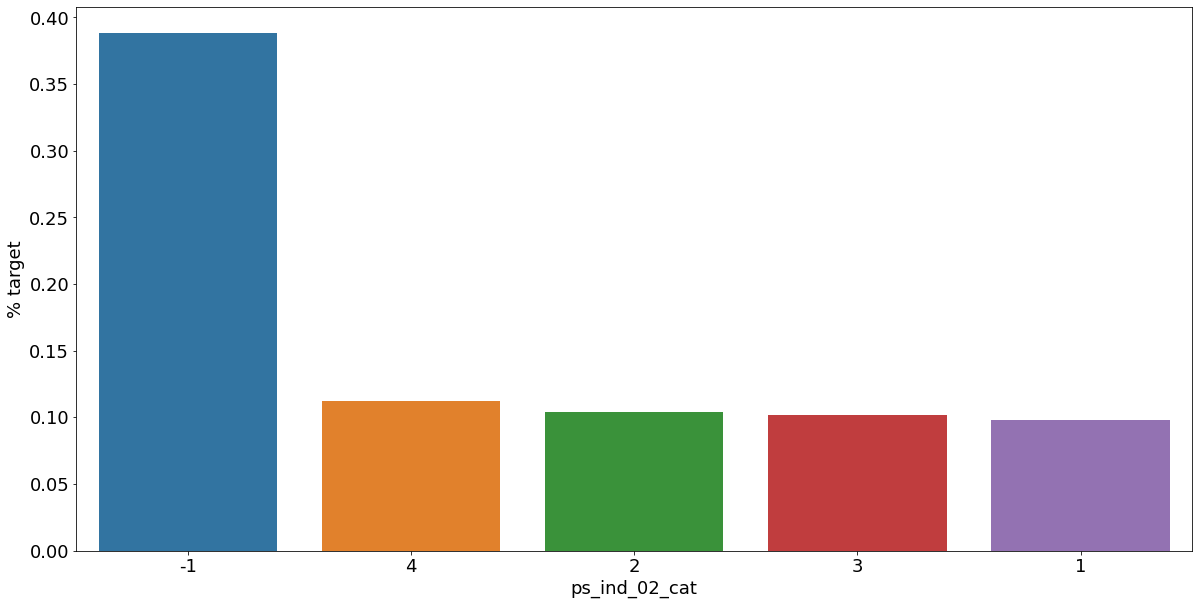

<Figure size 432x288 with 0 Axes>

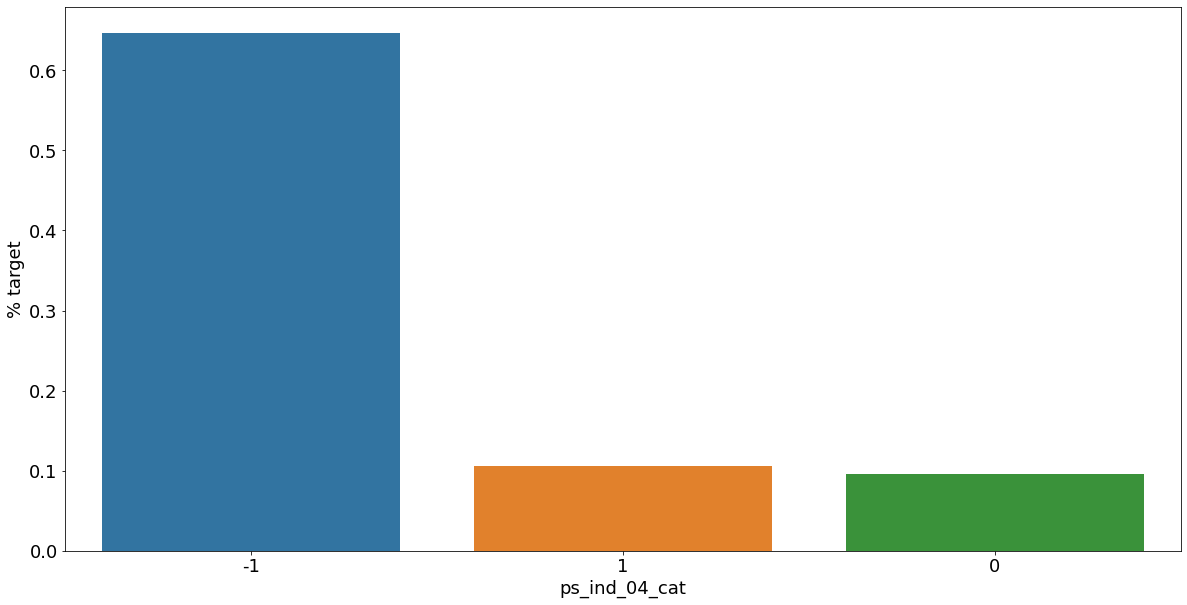

<Figure size 432x288 with 0 Axes>

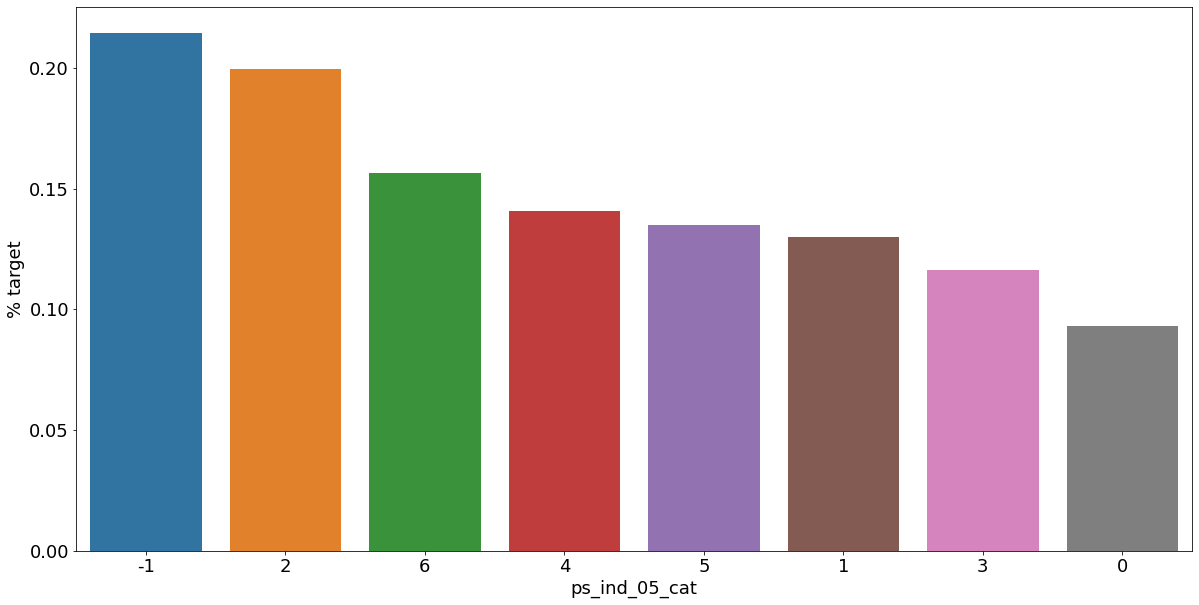

<Figure size 432x288 with 0 Axes>

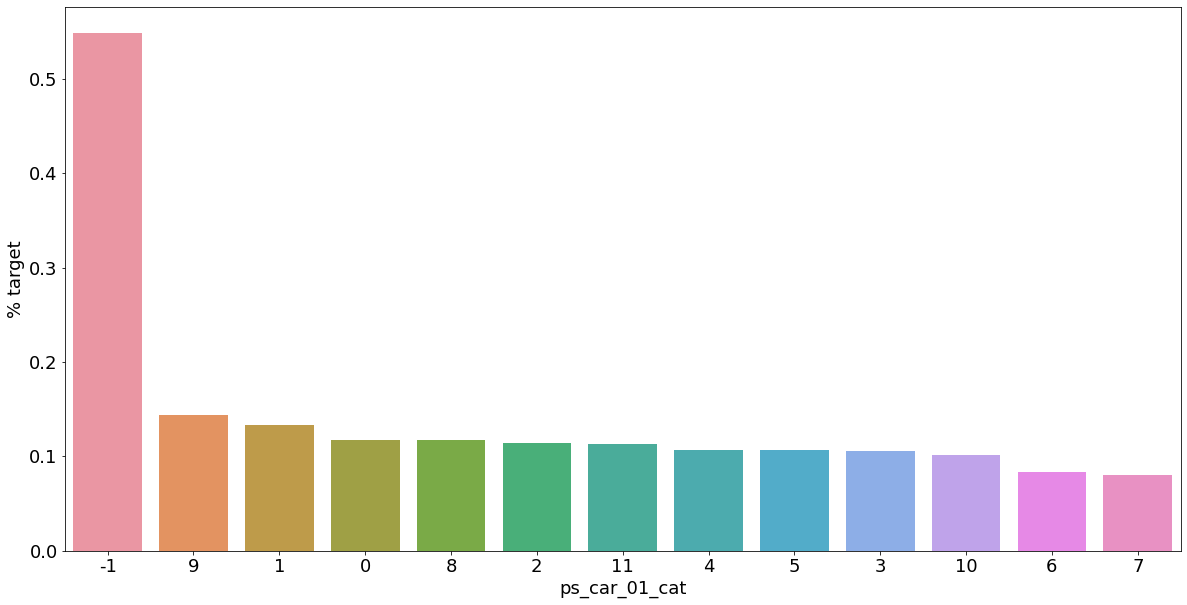

<Figure size 432x288 with 0 Axes>

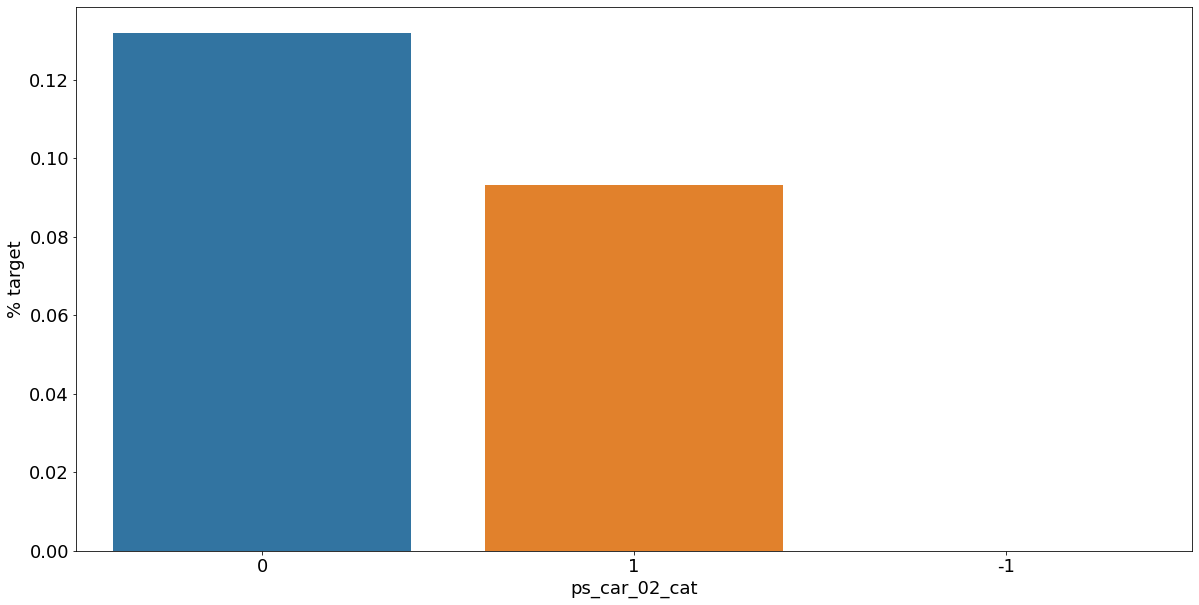

<Figure size 432x288 with 0 Axes>

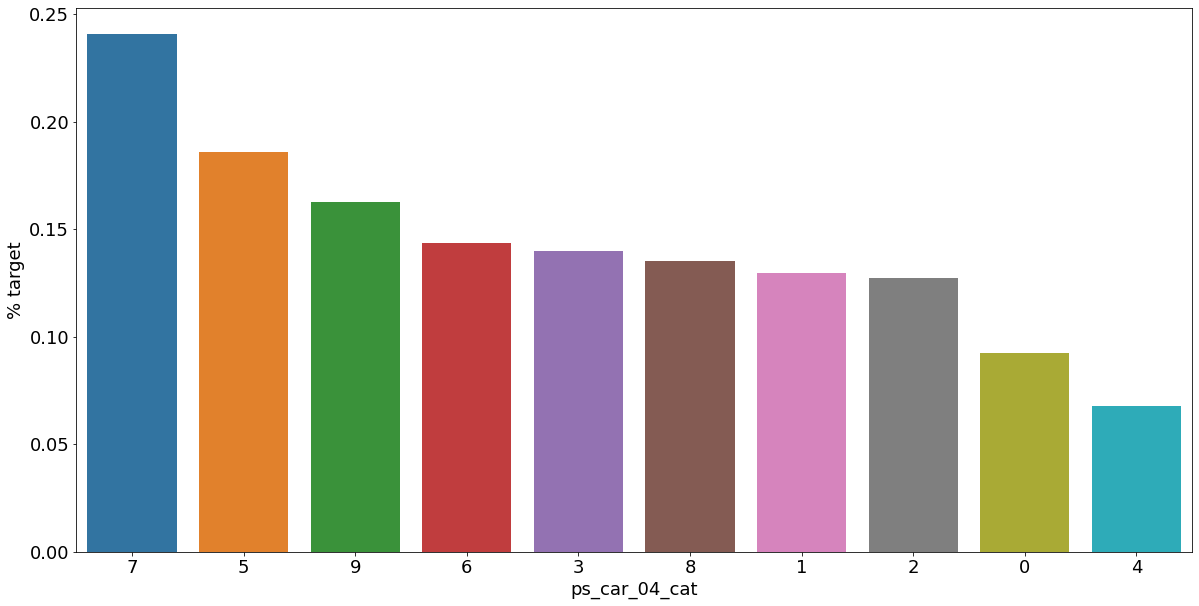

<Figure size 432x288 with 0 Axes>

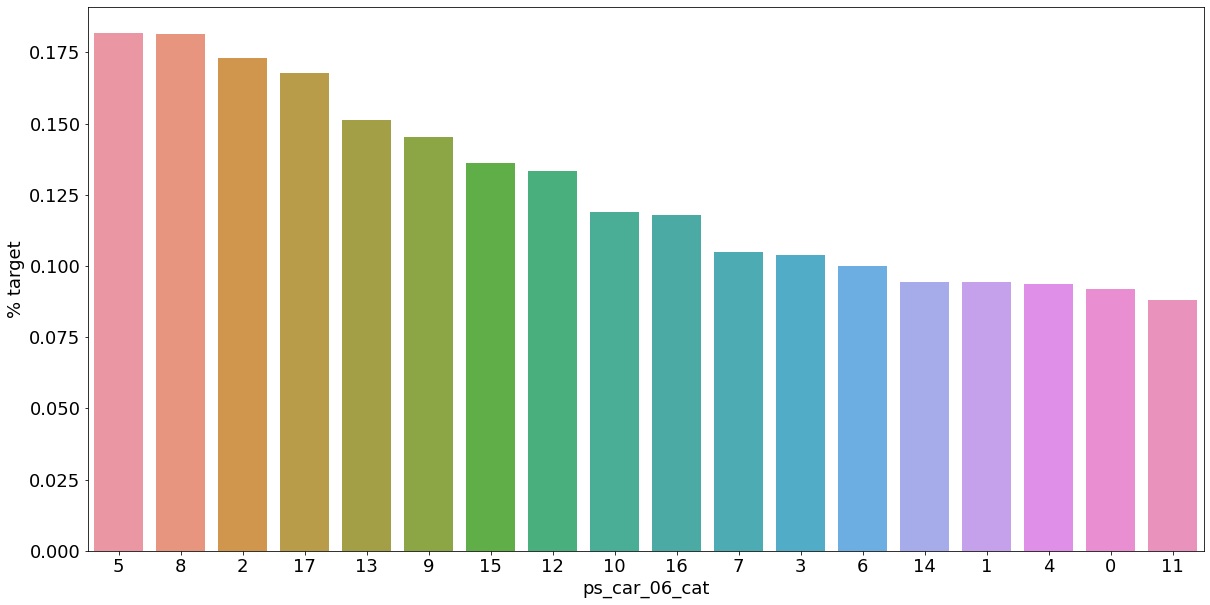

<Figure size 432x288 with 0 Axes>

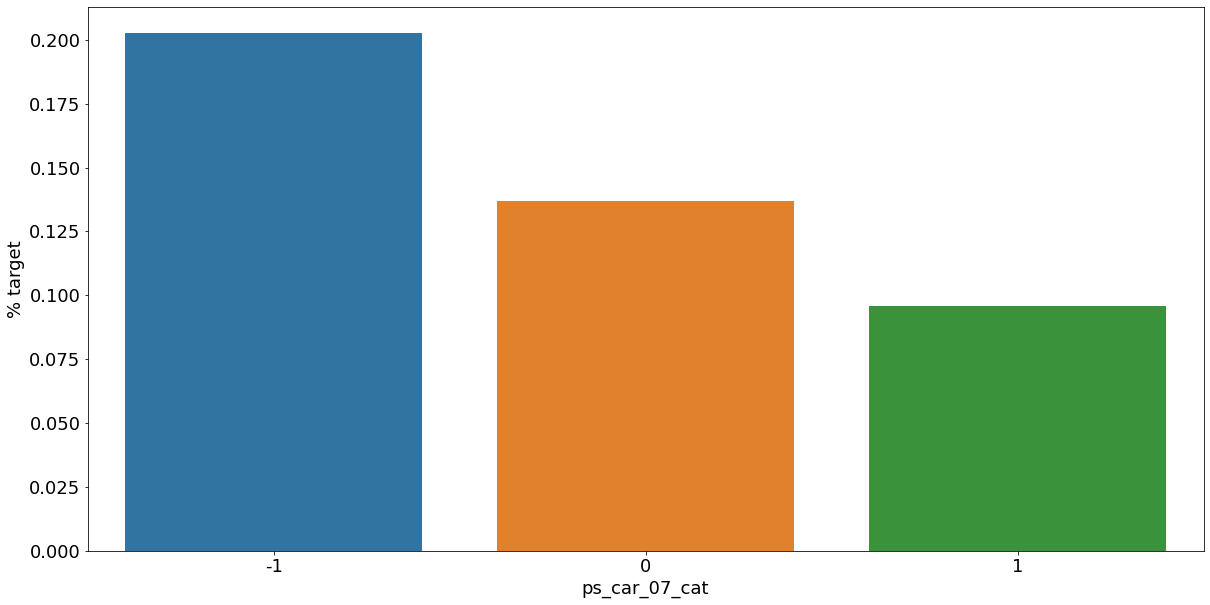

<Figure size 432x288 with 0 Axes>

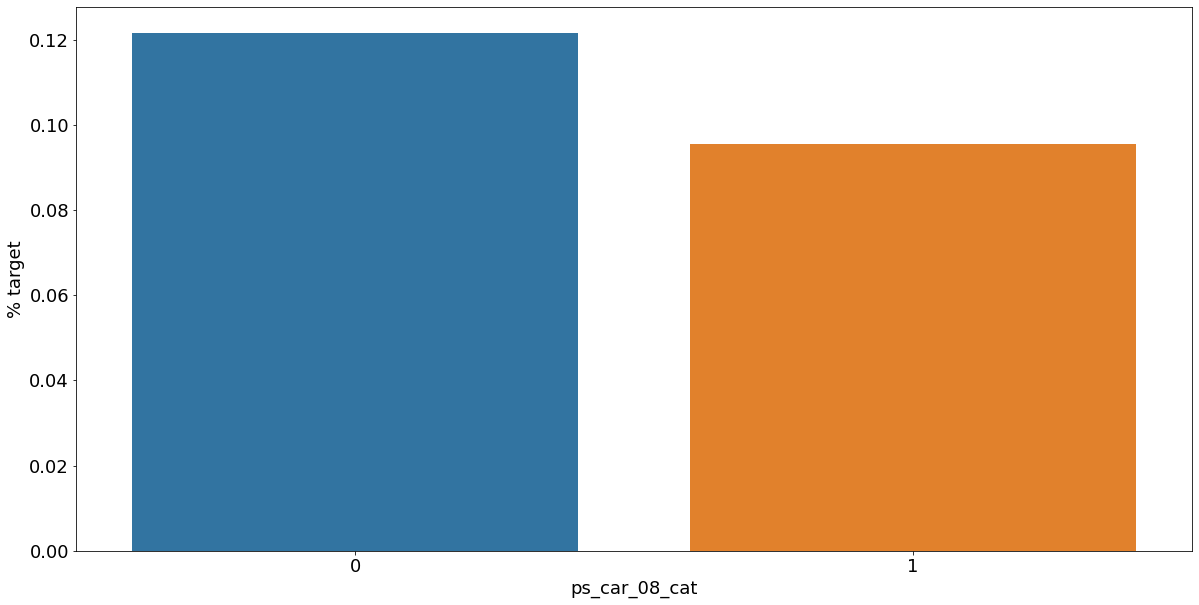

<Figure size 432x288 with 0 Axes>

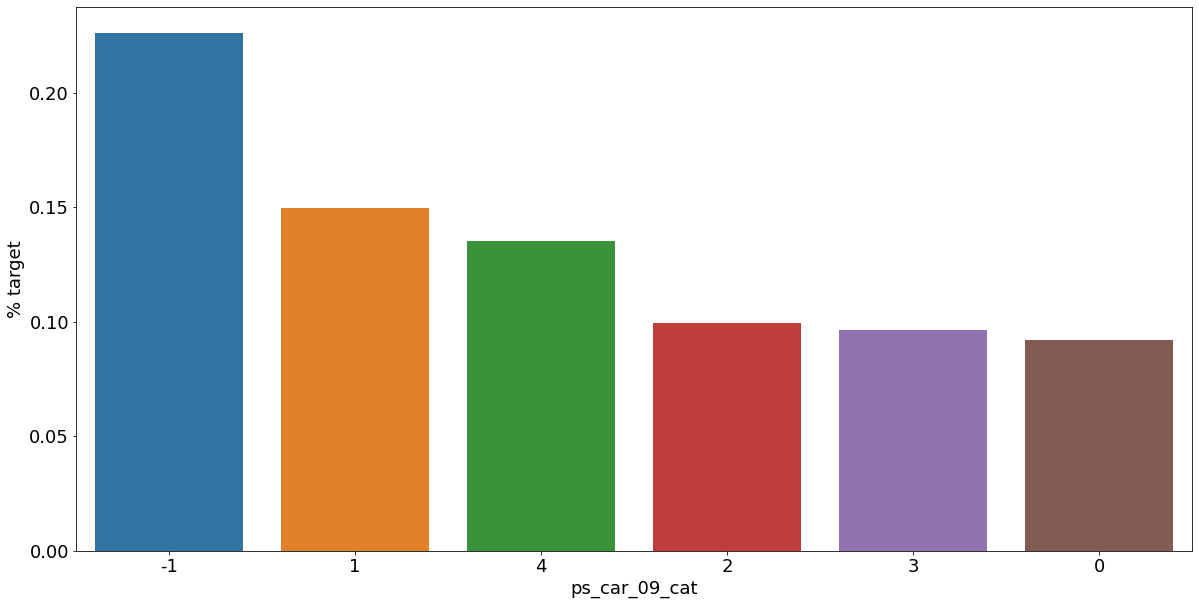

<Figure size 432x288 with 0 Axes>

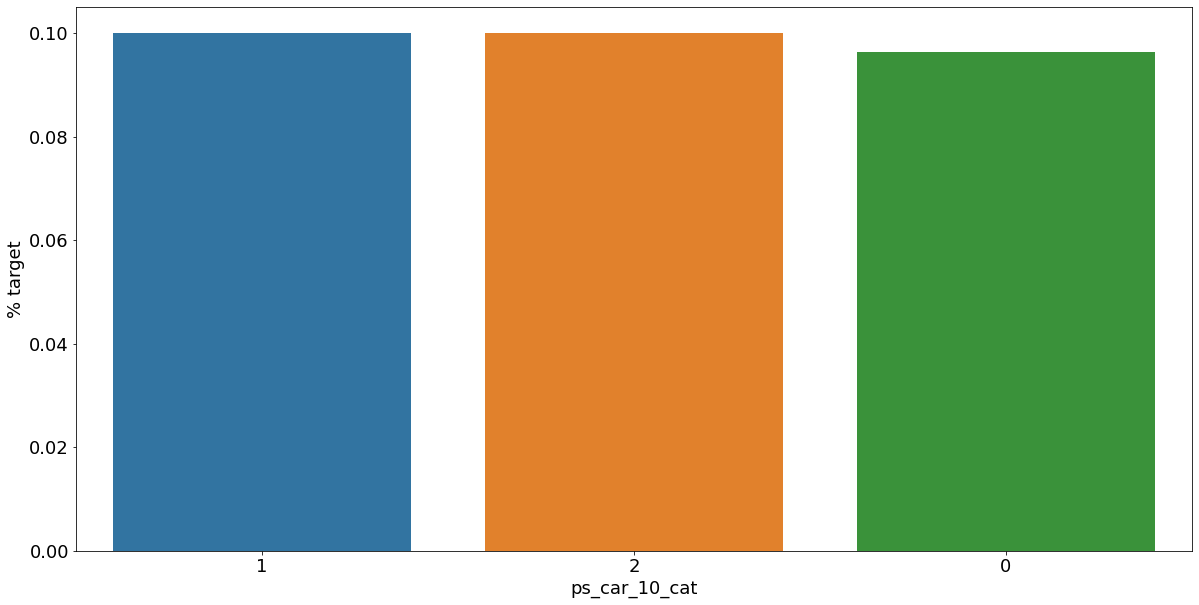

In [110]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index
for f in v:
    plt.figure()
    fig, ax = plt.subplots(figsize=(20,10))
    # Calculate the percentage of target=1 per category value
    cat_perc = train[[f, 'target']].groupby([f],as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    # Bar plot
    # Order the bars descending on target mean
    sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f])
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.show();

As we can see from the variables with missing values, it is a good idea to keep the missing values as a separate category value, instead of replacing them by the mode for instance. The customers with a missing value appear to have a much higher(in some cases much lower) probability to ask for an insurance claim.
- 변수의 빈값에서 알수 있듯이 빈 값들은 분리된 분류 값으로 하는 것이 기존 값을 대체하는 것보다 좋은 아이디어라고 생각된다. 빈 값이 있는 고객은 거 높거나 낮은 보험 요청을 한다고 보인다.


## Interval variables

Checking the coreelation between interval variables. A heatmeap is a good way to visualize the correlation between variables. The code below is based on an example by Micheal Waskom

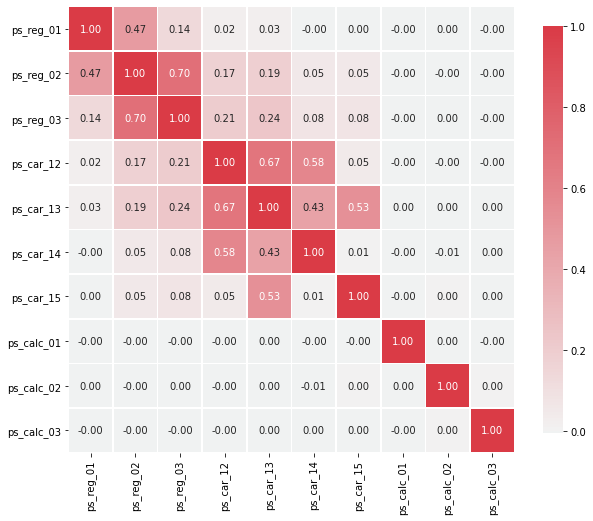

In [113]:
def corr_heatmap(v):
  correlations = train[v].corr()

  # Create color map ranging between two colors
  cmap = sns.diverging_palette(220, 10, as_cmap = True)

  fig, ax = plt.subplots(figsize = (10, 10))
  sns.heatmap(correlations, cmap = cmap, vmax = 1.0, center = 0, fmt = '.2f',
              square = True, linewidths = .5, annot = True, cbar_kws = {'shrink' : .75})
  plt.show();

v = meta[(meta.level == 'interval') & (meta.keep)].index
corr_heatmap(v)

There are a strong correlations between the variables:
* ps_reg_02 and ps_reg_03 (0.7)
* ps_car_12 and ps_car_13 (0.67)
* ps_Car_12 and ps_car_14 (0.58)
* ps_car_13 and ps_car_15 (0.67)

Seaborn has some handy plots to visualize the (linear) relationship between variables.
- Seaborn은 변수 사이의 관계를 보여주는 간단한 차트가 있다.

We could use a pairplot to visualize the relationship between the variables.
- 우리는 pairplot을 시각화를 위해 사용할 수 있고 이는 변수의 관계이다.

because the heatmap already showed the limited number of correlated variables, we'll look at each of the highly correlated variables separately.
-  heatmap은 이미 한계의 변수의 관계들을 보여준다. 우리는 높은 관계를 가진 변수들을 분리해서 보려고 한다.



In [114]:
s = train.sample(frac = 0.1)

### ps_reg_02 and ps_reg_03
As the regression line shows, there is a linear relationship between these variables.
- 회기 선에서 보이듯이, 이 변수들은 선형 관계가 있다.

Thanks to the hue parameter we can see that the regression lines for target  = 0  and target = 1 are the same
- hue 덕분에 우리는 회귀 선 0, 1이 같다는 것을 알 수 있다.



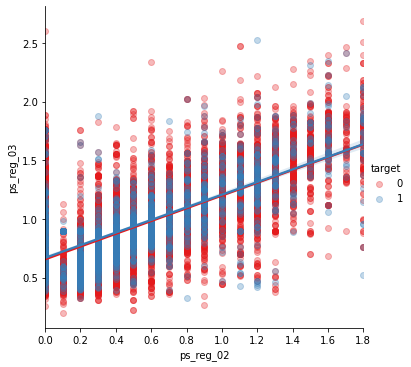

In [115]:
sns.lmplot(x = 'ps_reg_02', y = 'ps_reg_03', data = s, hue = 'target', palette = 'Set1', 
           scatter_kws = {'alpha' : 0.3})
plt.show()

### ps_car_12 and ps_car_13


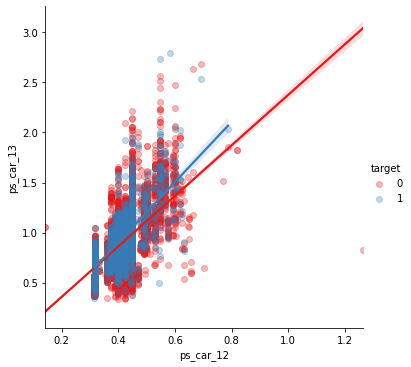

In [117]:
sns.lmplot(x = 'ps_car_12', y = 'ps_car_13', data = s, hue = 'target', palette = 'Set1',
           scatter_kws = {'alpha' : 0.3})
plt.show()

### ps_car_13 and ps_car_15


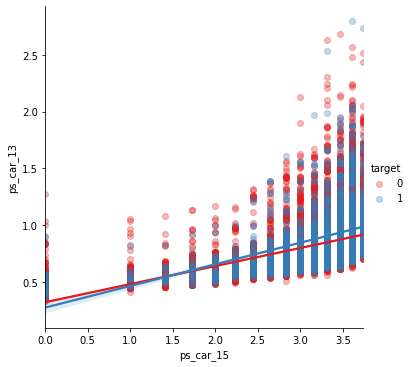

In [118]:
sns.lmplot(x = 'ps_car_15', y = 'ps_car_13', data = s, hue = 'target',
           palette = 'Set1', scatter_kws = {'alpha' : 0.3})
plt.show()

Alright, so now what? How can we decide which of the correlated variables to keep?
We could perform Principal Component Analysis(PCA) on the variables to reduce the dimensions. In the AllState Claims Severity Competition I mande this kernel to do that.
But as the number of correlated variables is rather low, we will let the model do the heavy_lifting.
- 어떻게 어떤 변수의 관계를 남겨야할지 결정할 수 있을까?
- 우리는 PCA를 수행해야한다. variable 차원을 줄이기 위해서.


## Checking the correlations between ordinal variables

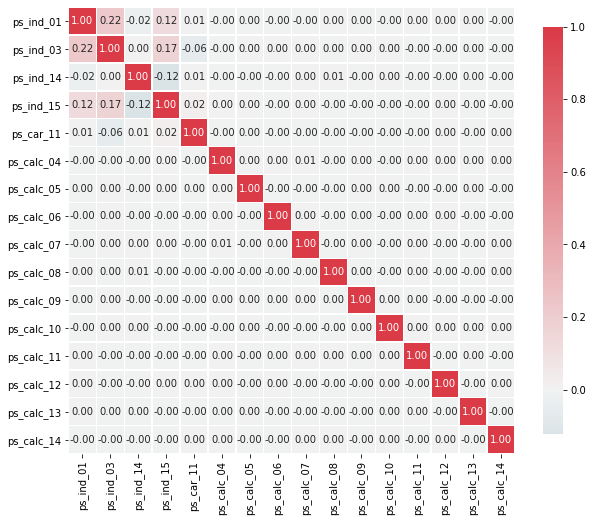

In [120]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
corr_heatmap(v)

For the ordinal variables we do not see many correlations. We could, on the other hand, look at how the distribution are when grouping by the target value.
- 순서 변수는 많은 상관관계를 판단할 수 없다. 반면에 얼마나 target 값을 그룹했을 때 분포되어있는지 알 수 있다.